installment and importing

In [ ]:
!pip install python-igraph
import igraph as ig

constracting and printing a simple graph

In [ ]:
g=ig.Graph(4,[(1, 3), (2, 0), (4, 1), (3, 2), (0, 4), (2, 1), (1, 0), (3, 4), (0, 2), (4, 3), (1, 2), (2, 4), (0, 1), (3, 1), (4, 0), (2, 3), (1, 4), (0, 3), (4, 2), (3, 0)])

print(g)
print("****")
print(g.neighbors(1))
print(g.successors(1))

IGRAPH U--- 5 20 --
+ edges:
0 -- 1 1 2 2 3 3 4 4   2 -- 0 0 1 1 3 3 4 4   4 -- 0 0 1 1 2 2 3 3
1 -- 0 0 2 2 3 3 4 4   3 -- 0 0 1 1 2 2 4 4
****
[0, 0, 2, 2, 3, 3, 4, 4]
[0, 0, 2, 2, 3, 3, 4, 4]


same graph, directed

In [ ]:
g=ig.Graph(4,[(1, 3), (2, 0), (4, 1), (3, 2), (0, 4), (2, 1), (1, 0), (3, 4), (0, 2), (4, 3), (1, 2), (2, 4), (0, 1), (3, 1), (4, 0), (2, 3), (1, 4), (0, 3), (4, 2), (3, 0)], directed=0)

print(g)

print(g.neighbors(1))
print(g.successors(1))

IGRAPH U--- 5 20 --
+ edges:
0 -- 1 1 2 2 3 3 4 4   2 -- 0 0 1 1 3 3 4 4   4 -- 0 0 1 1 2 2 3 3
1 -- 0 0 2 2 3 3 4 4   3 -- 0 0 1 1 2 2 4 4
[0, 0, 2, 2, 3, 3, 4, 4]
[0, 0, 2, 2, 3, 3, 4, 4]


plotting

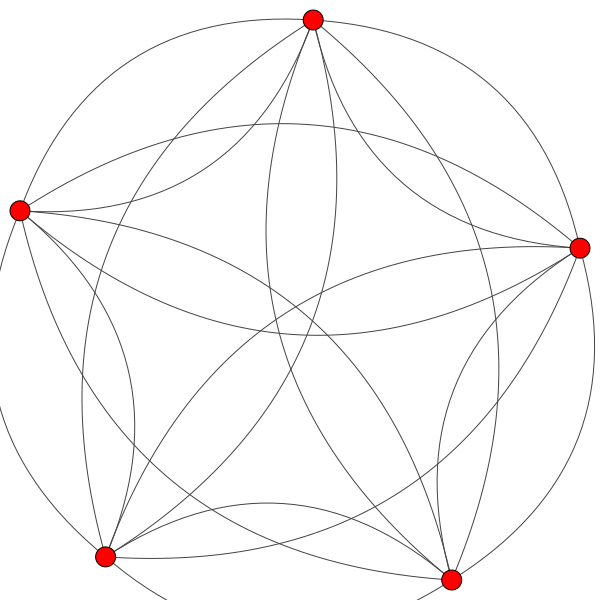

In [ ]:
import cairo

ig.plot(g)

attributions

IGRAPH U--- 5 20 --
+ attr: color (v), wight (v), length (e)
+ edges:
0 -- 1 1 2 2 3 3 4 4   2 -- 0 0 1 1 3 3 4 4   4 -- 0 0 1 1 2 2 3 3
1 -- 0 0 2 2 3 3 4 4   3 -- 0 0 1 1 2 2 4 4
****
[4.83, 0.67, 9.14, 2.05, 7.29]


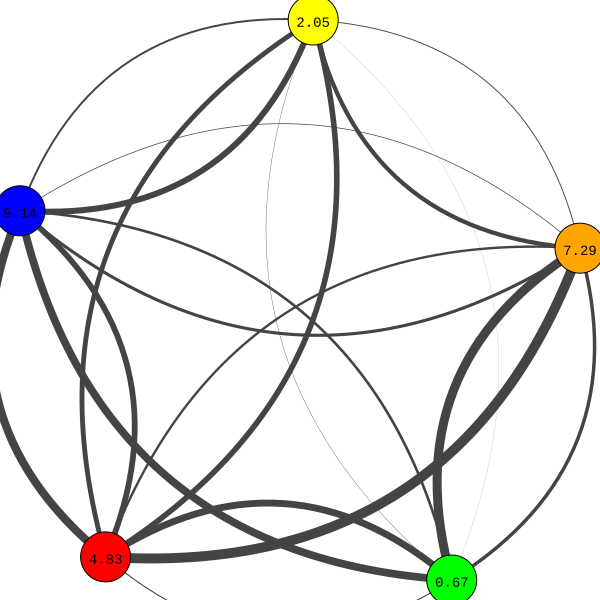

In [ ]:
g=g.as_undirected()

g.vs["wight"]=[4.83, 0.67, 9.14, 2.05, 7.29]
g.es["length"]=[0.12, 5.78, 3.49, 6.03, 9.91, 2.67, 1.08, 4.26, 8.15, 0.94, 7.72, 3.14, 6.88, 0.35, 2.40, 1.96, 9.02, 5.61, 0.73, 4.87]
g.vs["color"]=["red", "green", "blue", "yellow", "orange"]

print(g)
print("****")
print(g.vs["wight"])

ig.plot(g, vertex_label=g.vs["wight"], edge_width=g.es["length"], vertex_size=50, vertex_color=g.vs["color"])

IGRAPH UN-- 5 8 --
+ attr: gender (v), name (v), married (e)
+ edges (vertex names):
 Yossi Kohen -- Michal Kohen, Chaim Hirsh, Yona Azulay, Dana Azulay
Michal Kohen -- Yossi Kohen, Chaim Hirsh, Yona Azulay, Dana Azulay
 Chaim Hirsh -- Yossi Kohen, Michal Kohen
 Yona Azulay -- Yossi Kohen, Michal Kohen, Dana Azulay
 Dana Azulay -- Yossi Kohen, Michal Kohen, Yona Azulay


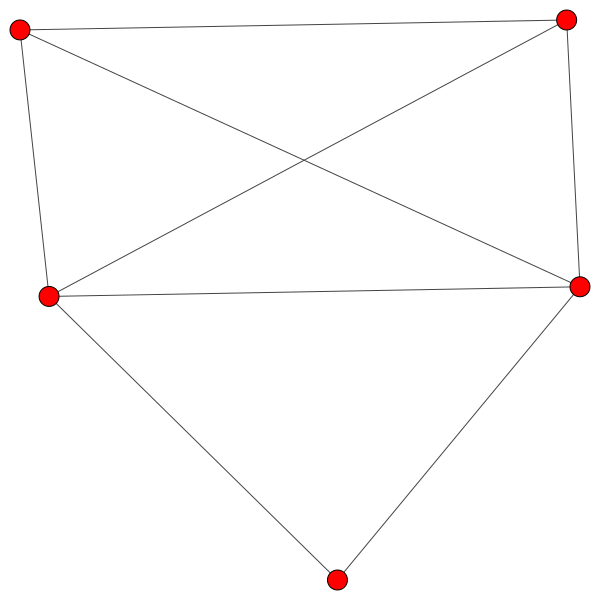

In [ ]:
n_vertices=5
edges = [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (3, 4)]

Social_connections_graph = ig.Graph(n_vertices, edges)


Social_connections_graph.vs["name"] = ["Yossi Kohen", "Michal Rozenberg", "Chaim Hirsh", "Yona Azulay", "Dana Azulay"]
Social_connections_graph.vs["gender"] = ["M", "F", "F", "M", "F"]
Social_connections_graph.es["married"] = [False, False, False, False, False, False, False, True]

# Set individual attributes
Social_connections_graph.vs[1]["name"] = "Michal Kohen"
Social_connections_graph.es[0]["married"] = True
print(Social_connections_graph)

ig.plot(Social_connections_graph)

a little more complicated plotting

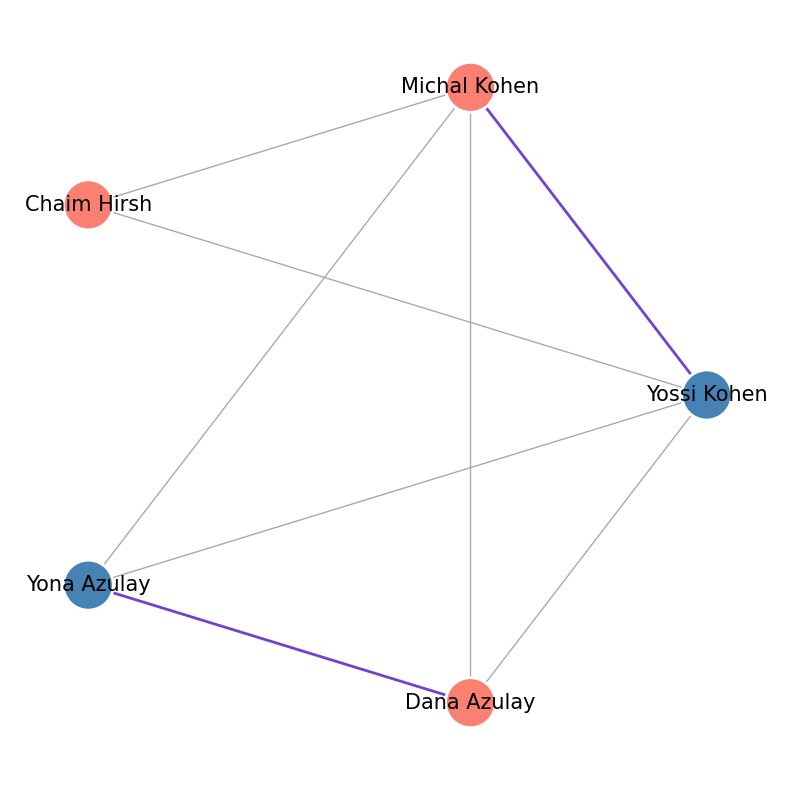

In [ ]:
import matplotlib.pyplot as plt
Social_connections_graph["title"] = "Small Social Network"

fig, ax = plt.subplots(figsize=(10,10))
ig.plot(
    Social_connections_graph,
    target=ax,
    layout="circle",
    vertex_size=50,
    vertex_color=["steelblue" if gender == "M" else "salmon" for gender in Social_connections_graph.vs["gender"]],
    vertex_frame_width=2,
    vertex_frame_color="white",
    vertex_label=Social_connections_graph.vs["name"],
    vertex_label_size=15,
    edge_width=[2 if married else 1 for married in Social_connections_graph.es["married"]],
    edge_color=["#7142cf" if married else "#AAA" for married in Social_connections_graph.es["married"]]
)

plt.show()

getting the adjacency matrix

In [ ]:
Social_connections_graph.get_adjacency()

Matrix([[0, 1, 1, 1, 1], [1, 0, 1, 1, 1], [1, 1, 0, 0, 0], [1, 1, 0, 0, 1], [1, 1, 0, 1, 0]])

generating a graph from adjacency matrix

IGRAPH D--- 10 27 --
+ edges:
 0 ->  1  4          3 ->  2  4          6 ->  1  5  7       9 ->  8
 1 ->  0  2  6       4 ->  0  3  5       7 ->  2  6  8
 2 ->  1  3  5  7    5 ->  4  6  8       8 ->  5  7  9


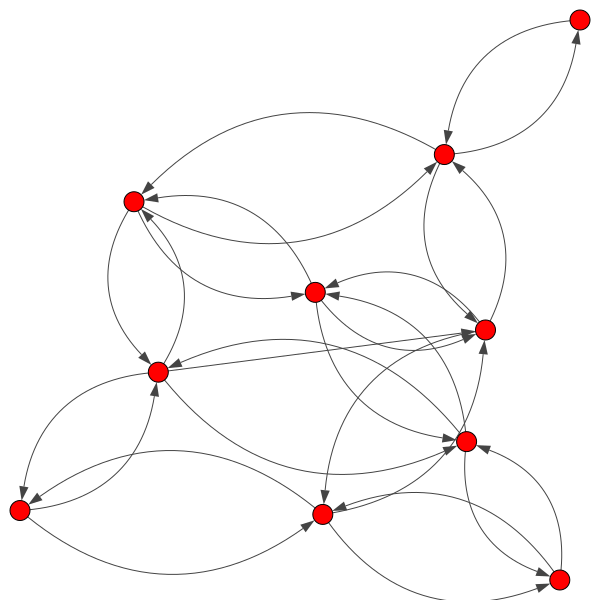

In [ ]:
g0 = ig.Graph.Adjacency([
 [0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 1, 0, 0, 0],
 [0, 1, 0, 1, 0, 1, 0, 1, 0, 0],
 [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]],
 #mode=ig.ADJ_UNDIRECTED
                       )

print(g0)
ig.plot(g0)

generating a graph from a formula

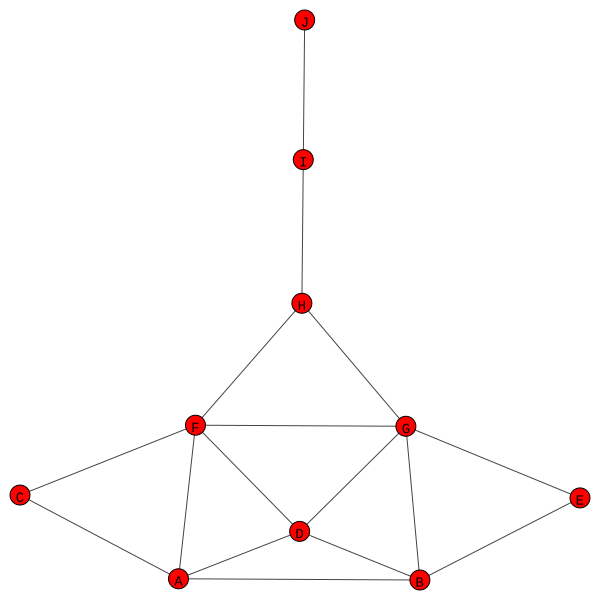

In [ ]:
asdf=ig.Graph.Formula('D-A:B:F:G, A-C-F-A, B-E-G-B, A-B, F-G, H-F:G, H-I-J')

ig.plot(asdf, vertex_label=asdf.vs['name'])

generating a bipartite graph

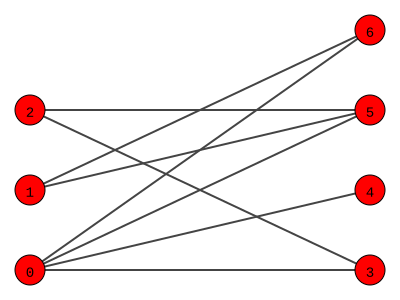

In [ ]:
left_size = 3
right_size = 4
edges = [(0, 3), (0, 4), (0, 5), (0, 6), (1, 5), (2,3), (2, 5), (1, 6)]

bi_part = ig.Graph(edges=edges, directed=False)
bi_part.vs["type"] = [0]*left_size + [1]*right_size


layout = []
spacing = 1.5

for i in range(left_size):
    layout.append((0, -i * spacing))

for i in range(right_size):
    layout.append((3, -i * spacing))


ig.plot(
    bi_part,
    layout=layout,
    vertex_size=30,
    vertex_label=bi_part.vs.indices,
    edge_width=2,
    bbox=(400, 300),
    margin=30
)

generating a full graph

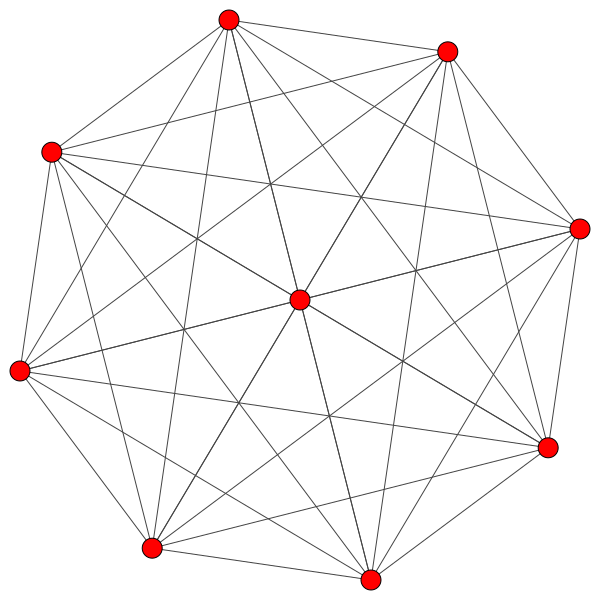

In [ ]:
full = ig.Graph.Full(n=9)

ig.plot(full)

generating a lattice

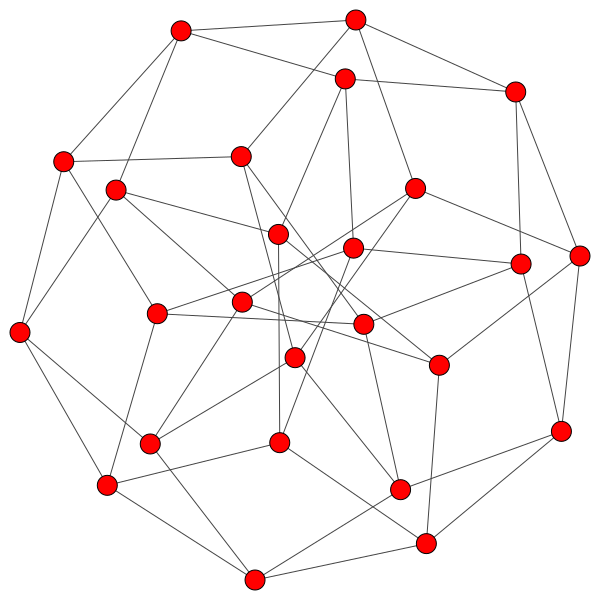

In [ ]:
lattice = ig.Graph.Lattice([5,5])

ig.plot(lattice)

generating a 3-D lattice

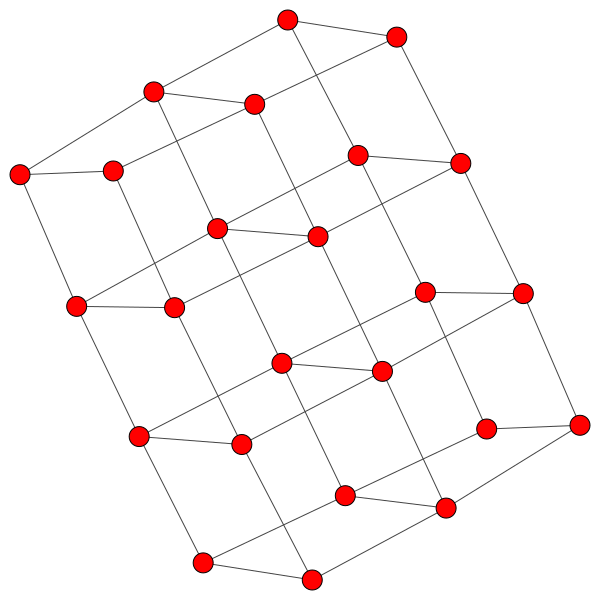

In [ ]:
Three_D=ig.Graph.Lattice([2,3,4], circular=0)

ig.plot(Three_D)

A random graph

IGRAPH U--- 100 266 --
+ edges:
  0 --   9  34  40  42  47  91                                76 --   8  46
72  99
  1 --   3   4  18  22  26  36  37  51  52  63  90  93        77 --  12  14
42  54
  2 --   4  23  36  48  65  89                                78 --   4  28
52
  3 --   1  71                                                79 --  11  39
65  83  85  87
  4 --   1   2  36  64  72  78                                80 --   5  19
50  83  88
  5 --  24  48  73  80  81                                    81 --   5  47
  6 --  20  22  26  83  97                                    82 --  10  20
28  34  40  56  72  83  97
  7 --  26  45  48  60  71  72  83                            83 --   6   7
19  25  79  80  82
  8 --  11  30  61  76  87                                    84 --  24  85
  9 --   0  16  17  20  51                                    85 --  28  59
79  84  96  99
 10 --  28  30  60  61  82  90                                86 --  17  29
40  93  99
 11 --   8  16  3

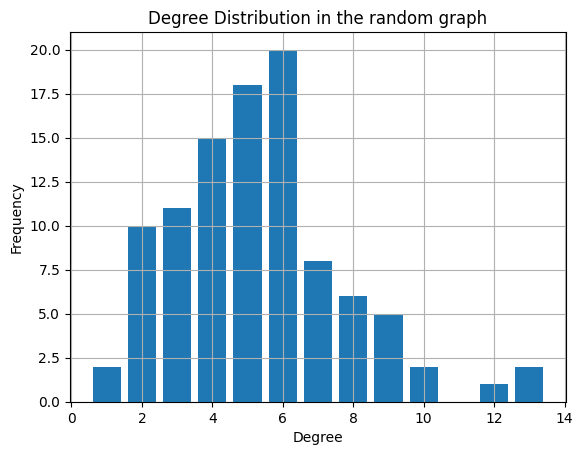

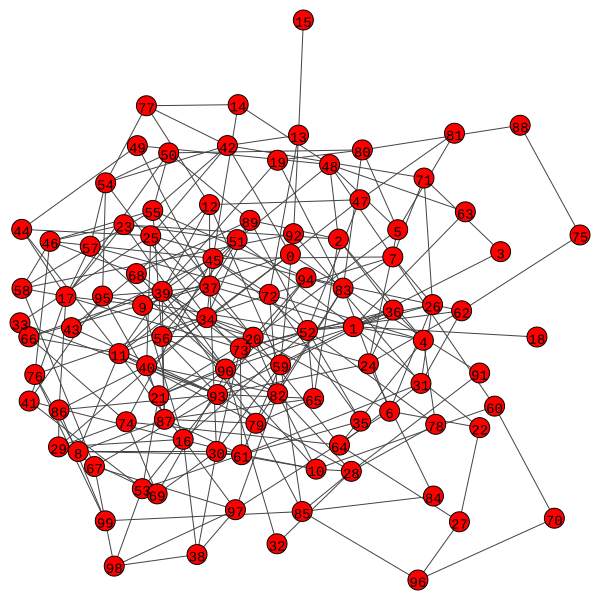

In [ ]:
rand_graph=ig.Graph.Erdos_Renyi(100, 0.05)

print(rand_graph)
print("****")

n = 79

print("The degree of" , n, "is:", rand_graph.degree(n))
print("****")
print("The clustering coefficient of", n, "is:", rand_graph.transitivity_local_undirected(n))
print("****")

source=5
target=54

path = rand_graph.distances(source, target)

what_to_cut = rand_graph.mincut(source,target)

D = rand_graph.diameter()

average_path = rand_graph.average_path_length()

degree_distribution = rand_graph.degree_distribution()



print("The lngth of the shortest path between", source, "and" , target, "is:", path, "and the path is:", rand_graph.get_shortest_paths(source,target))
print("****")
print("The minimum amount to cut between", source, "and" , target, "is:", what_to_cut.value)
print("****")
print("The diameter is:", D)
print("****")
print("The average path is:", average_path)
print("****")
print(degree_distribution)
print("****")

for i in range(100):
    print(i, ":", rand_graph.degree(i))

from collections import Counter

degrees_raw = rand_graph.degree()
degree_counts = Counter(degrees_raw)

sorted_degrees = sorted(degree_counts.items())
degrees = [d for d, _ in sorted_degrees]
frequencies = [c for _, c in sorted_degrees]

plt.bar(degrees, frequencies, width=0.8)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution in the random graph")
plt.grid(True)
plt.show()



ig.plot(rand_graph, vertex_label=rand_graph.vs.indices)

A free scale(Barabasi Albert) graph

IGRAPH U--- 100 197 --
+ edges:
0--1 0--2 1--2 2--3 0--3 0--4 2--4 2--5 0--5 0--6 2--6 0--7 6--7 2--8 0--8
2--9 0--9 2--10 0--10 2--11 0--11 2--12 0--12 0--13 2--13 0--14 2--14 0--15
2--15 2--16 0--16 2--17 0--17 0--18 2--18 0--19 2--19 0--20 2--20 0--21 2--21
2--22 0--22 2--23 0--23 0--24 2--24 2--25 0--25 2--26 0--26 0--27 2--27 0--28
2--28 0--29 2--29 2--30 0--30 2--31 0--31 0--32 2--32 2--33 0--33 2--34 0--34
2--35 0--35 0--36 2--36 2--37 0--37 2--38 0--38 2--39 0--39 2--40 0--40 2--41
0--41 0--42 2--42 0--43 2--43 0--44 2--44 2--45 0--45 0--46 2--46 0--47 2--47
2--48 0--48 0--49 2--49 0--50 2--50 2--51 0--51 2--52 0--52 0--53 2--53 0--54
2--54 2--55 0--55 0--56 2--56 2--57 0--57 0--58 2--58 0--59 2--59 2--60 0--60
0--61 2--61 2--62 0--62 2--63 0--63 2--64 0--64 0--65 2--65 2--66 0--66 2--67
0--67 2--68 0--68 0--69 2--69 0--70 2--70 2--71 0--71 0--72 2--72 0--73 2--73
0--74 2--74 0--75 2--75 2--76 0--76 2--77 0--77 0--78 2--78 2--79 0--79 2--80
0--80 0--81 2--81 0--82 2--82 0--83 2

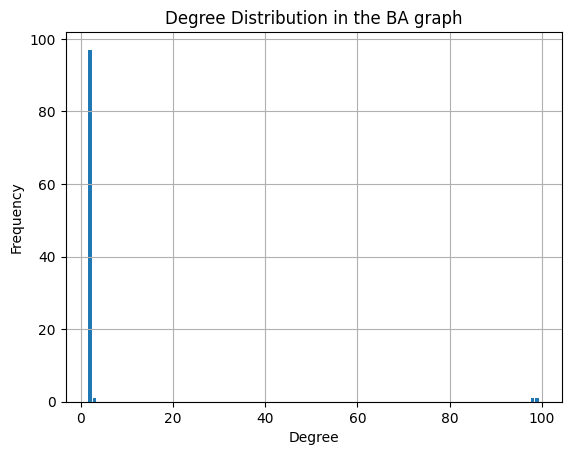

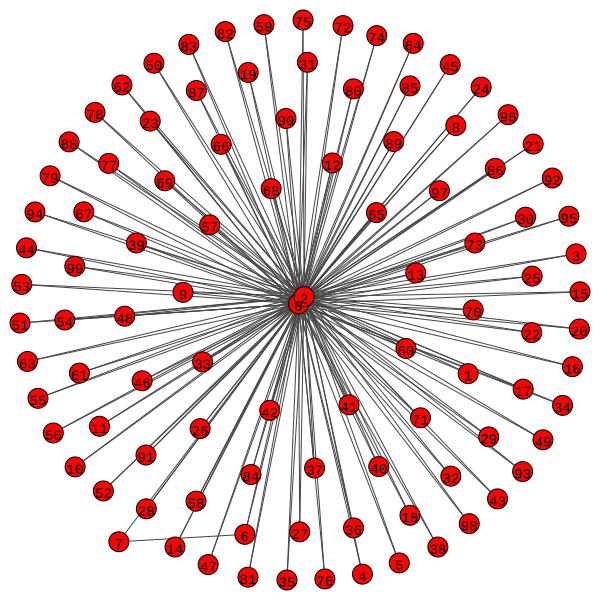

In [ ]:
scale_free_graph=ig.Graph.Barabasi(100,2,power=3.5)

print(scale_free_graph)

print("****")

n = 79

print("The degree of" , n, "is:", scale_free_graph.degree(n))
print("****")
print("The clustering coefficient of", n, "is:", scale_free_graph.transitivity_local_undirected(n))
print("****")

source=5
target=54

path = scale_free_graph.distances(source, target)

what_to_cut = scale_free_graph.mincut(source,target)

D = scale_free_graph.diameter()

average_path = scale_free_graph.average_path_length()

degree_distribution = scale_free_graph.degree_distribution()



print("The length of the shortest path between", source, "and" , target, "is:", path, "and the path is:", scale_free_graph.get_shortest_paths(source,target))
print("****")
print("The minimum amount to cut between", source, "and" , target, "is:", what_to_cut.value)
print("****")
print("The diameter is:", D)
print("****")
print("The average path is:", average_path)
print("****")
print(degree_distribution)
print("****")

print("****")

for i in range(100):
    print(i, ":", scale_free_graph.degree(i))
from collections import Counter

degrees_raw = scale_free_graph.degree()
degree_counts = Counter(degrees_raw)

sorted_degrees = sorted(degree_counts.items())
degrees = [d for d, _ in sorted_degrees]
frequencies = [c for _, c in sorted_degrees]

plt.bar(degrees, frequencies, width=0.8)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution in the BA graph")
plt.grid(True)
plt.show()

ig.plot(scale_free_graph, vertex_label=scale_free_graph.vs.indices)






Wighted paths

In [ ]:
import random

scale_free_graph.es["length"] = [round(random.uniform(0.1, 100), 2) for _ in scale_free_graph.es]

z=scale_free_graph.distances(source, target, weights="length")

print("The length of the path between", source, "and" , target, "in the unweighted graph is:", path, "with the path being:",  scale_free_graph.get_shortest_paths(source,target))
print("The length of the path between", source, "and" , target, "in the unweighted graph is:", z, "with the path being:",  scale_free_graph.get_shortest_paths(source,target, weights="length"))

The length of the path between 5 and 54 in the unweighted graph is: [[2]] with the path being: [[5, 0, 54]]
The length of the path between 5 and 54 in the unweighted graph is: [[94.56]] with the path being: [[5, 0, 40, 2, 54]]


In [ ]:
rand_graph.es["length"] = [round(random.uniform(0.1, 100), 2) for _ in rand_graph.es]

z=rand_graph.distances(source, target, weights="length")

print("The length of the path between", source, "and" , target, "in the unweighted graph is:", rand_graph.distances(source, target), "with the path being:",  rand_graph.get_shortest_paths(source,target))
print("The length of the path between", source, "and" , target, "in the unweighted graph is:", z, "with the path being:",  rand_graph.get_shortest_paths(source,target, weights="length"))

The length of the path between 5 and 54 in the unweighted graph is: [[3]] with the path being: [[5, 24, 34, 54]]
The length of the path between 5 and 54 in the unweighted graph is: [[144.12]] with the path being: [[5, 73, 52, 89, 34, 54]]
